### score 0.778 (Public)

file : baseline_lgb_0819_2213.csv

In [163]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [164]:
FILEPATH_APPLICATION_TRAIN     = "../data/application_train.csv.f"
FILEPATH_APPLICATION_TEST      = "../data/application_test.csv.f"



# aggregated features
FILEPATH_BUREAU_AGG                  = "../data/bureau_agg_0819.csv.f"
FILEPATH_FEATURE_PREV_APP            = "../data/prev_app_feature_0819.csv.f"
FILEPATH_FEATURE_INSTALLMENT_PAYMENT = "../data/prev_insallment_payment_feature_0819.csv.f"
FILEPATH_FEATURE_CC_BALANCE          = "../data/prev_credit_card_balance_feature_0819_1.csv.f"
FILEPATH_FEATURE_POS_CASH_BALANCE    = "../data/POS_CASH_balance_feature_0819_1.csv.f"


In [165]:
df_app_train = pd.read_feather(FILEPATH_APPLICATION_TRAIN)
df_app_test  = pd.read_feather(FILEPATH_APPLICATION_TEST)

df_bureau_agg = pd.read_feather(FILEPATH_BUREAU_AGG)
df_feature_prev_app = pd.read_feather(FILEPATH_FEATURE_PREV_APP)
df_feature_inst_payment = pd.read_feather(FILEPATH_FEATURE_INSTALLMENT_PAYMENT)
df_feature_cc_balance = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE)
df_feature_pos_cash_balance = pd.read_feather(FILEPATH_FEATURE_POS_CASH_BALANCE)


In [166]:
df_app_train.shape

(307511, 122)

In [167]:
df_app_test.shape

(48744, 121)

### condatenate train and test data

In [168]:
df_app_all = pd.concat([df_app_train, df_app_test])
del df_app_train
del df_app_test

In [169]:
df_app_all.shape

(356255, 122)

In [170]:
df_app_all['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

### join other tables

In [171]:
df_app_all = pd.merge(df_app_all, df_bureau_agg, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_prev_app, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_inst_payment, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_pos_cash_balance, on = 'SK_ID_CURR', how='left')




In [172]:
df_app_all.shape

(356255, 275)

In [173]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [174]:
# Missing values statistics
missing_values = missing_values_table(df_app_all)
missing_values.head(20)

Your selected dataframe has 275 columns.
There are 221 columns that have missing values.


,Missing Values,% of Total Values
p_RATE_INTEREST_PRIMARY,350534,98.4
p_RATE_INTEREST_PRIVILEGED,350534,98.4
cc_bal_AMT_PAYMENT_CURRENT,284135,79.8
cc_bal_CNT_DRAWINGS_POS_CURRENT,284061,79.7
cc_bal_CNT_DRAWINGS_ATM_CURRENT,284061,79.7
cc_bal_AMT_DRAWINGS_POS_CURRENT,284061,79.7
cc_bal_AMT_DRAWINGS_OTHER_CURRENT,284061,79.7
cc_bal_CNT_DRAWINGS_OTHER_CURRENT,284061,79.7
cc_bal_AMT_DRAWINGS_ATM_CURRENT,284061,79.7
cc_bal_AMT_RECEIVABLE_PRINCIPAL,252697,70.9


In [175]:
# Number of each type of column
df_app_all.dtypes.value_counts()

float64    219
int64       40
object      16
dtype: int64

In [176]:
# Number of unique classes in each object column
df_app_all.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

### Encoding Categorical Values(1) Target Encoding

As for OCCUPATION_TYPE and ORGANIZATION_TYPE, execute target encoding.

In [177]:
from sklearn.model_selection import KFold
target_enc_cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

for target_enc_col in target_enc_cols:
    print(target_enc_col)
    target_mean = df_app_all.groupby(target_enc_col).TARGET.mean()
    df_app_all[target_enc_col] = df_app_all[target_enc_col].map(target_mean)


OCCUPATION_TYPE
ORGANIZATION_TYPE


In [178]:
df_app_all['OCCUPATION_TYPE'].head()

0    0.105788
1    0.063040
2    0.105788
3    0.105788
4    0.063040
Name: OCCUPATION_TYPE, dtype: float64

### Encoding Categorical Values

columns which have two unique values            -> Label Encoding<br>
columns which have more than three unique values -> One-hot Encoding

In [179]:
KEY_COLUMN = 'SK_ID_CURR'



label encoding

In [180]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_app_all:
    if df_app_all[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_app_all[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_app_all[col])
            # Transform both training and testing data
            df_app_all[col] = le.transform(df_app_all[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
        else:
            df_app_all.drop(columns = col, inplace=True)
print('%d columns were label encoded.' % le_count)

print('shape :', df_app_all.shape)

3 columns were label encoded.
shape : (356255, 264)


One-hot encoding

In [181]:
# one-hot encoding of categorical variables
df_app_all = pd.get_dummies(df_app_all)
print('shape :', df_app_all.shape)


shape : (356255, 264)


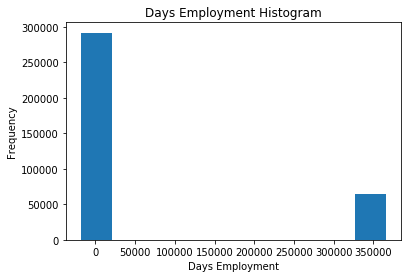

In [182]:
df_app_all['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [183]:
anom = df_app_all[df_app_all['DAYS_EMPLOYED'] == 365243]
non_anom = df_app_all[df_app_all['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 64648 anomalous days of employment


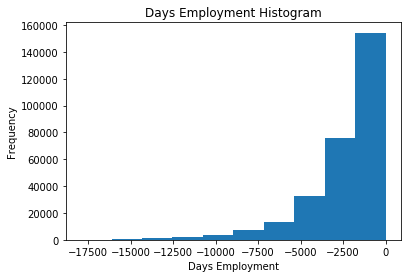

In [184]:
# Create an anomalous flag column
df_app_all['DAYS_EMPLOYED_ANOM'] = df_app_all["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_app_all['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_app_all['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [185]:
# Find the correlation of the positive days since birth and target
df_app_all['DAYS_BIRTH'] = abs(df_app_all['DAYS_BIRTH'])
df_app_all['DAYS_BIRTH'].corr(df_app_all['TARGET'])

-0.07823930830982709

In [186]:
df_app_all.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'pcb_SK_DPD', 'pcb_SK_DPD_DEF',
       'pcb_NAME_CONTRACT_STATUS_Amortized debt',
       'pcb_NAME_CONTRACT_STATUS_Approved',
       'pcb_NAME_CONTRACT_STATUS_Canceled',
       'pcb_NAME_CONTRACT_STATUS_Completed', 'pcb_NAME_CONTRACT_STATUS_Demand',
       'pcb_NAME_CONTRACT_STATUS_Returned to the store',
       'pcb_NAME_CONTRACT_STATUS_Signed', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=265)

### Add Extracted Features

In [212]:
app_all_domain = df_app_all.copy()

df_app_all['ap_ex_LOG_AMT_INCOME_TOTAL'] = np.log1p(df_app_all['AMT_INCOME_TOTAL'])
df_app_all['ap_ex_CREDIT_INCOME_PERCENT'] = df_app_all['AMT_CREDIT'] / df_app_all['AMT_INCOME_TOTAL']
df_app_all['ap_ex_ANNUITY_INCOME_PERCENT'] = df_app_all['AMT_ANNUITY'] / df_app_all['AMT_INCOME_TOTAL']
df_app_all['ap_ex_CREDIT_TERM'] = df_app_all['AMT_ANNUITY'] / df_app_all['AMT_CREDIT']
df_app_all['ap_ex_DAYS_EMPLOYED_PERCENT'] = df_app_all['DAYS_EMPLOYED'] / df_app_all['DAYS_BIRTH']

In [213]:
print(app_all_domain.shape)

(356255, 269)


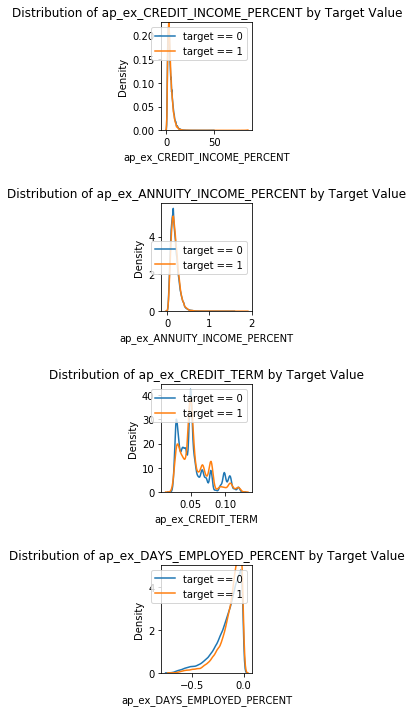

In [214]:
plt.figure(figsize = (4, 10))
# iterate through the new features
for i, feature in enumerate(['ap_ex_CREDIT_INCOME_PERCENT', 
                             'ap_ex_ANNUITY_INCOME_PERCENT', 
                             'ap_ex_CREDIT_TERM',
                             'ap_ex_DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_app_all.loc[df_app_all['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_app_all.loc[df_app_all['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### split train and test

In [215]:
df_app_test = df_app_all[df_app_all['TARGET'].isnull()].drop(columns = ['TARGET'])
df_app_train = df_app_all[df_app_all['TARGET'].notnull()]



In [216]:
df_app_test.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,pcb_NAME_CONTRACT_STATUS_Completed,pcb_NAME_CONTRACT_STATUS_Demand,pcb_NAME_CONTRACT_STATUS_Returned to the store,pcb_NAME_CONTRACT_STATUS_Signed,DAYS_EMPLOYED_ANOM,ap_ex_CREDIT_INCOME_PERCENT,ap_ex_ANNUITY_INCOME_PERCENT,ap_ex_CREDIT_TERM,ap_ex_DAYS_EMPLOYED_PERCENT,ap_ex_LOG_AMT_INCOME_TOTAL
307511,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,False,4.213333,0.152300,0.036147,-0.121044,11.813037
307512,17370.0,222768.0,180000.0,99000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,1.0,False,2.250182,0.175455,0.077973,-0.247398,11.502885
307513,69777.0,663264.0,630000.0,202500.0,0.0,0.0,0.0,1.0,0.0,4.0,...,3.0,0.0,0.0,1.0,False,3.275378,0.344578,0.105202,-0.222477,12.218500
307514,49018.5,1575000.0,1575000.0,315000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,False,5.000000,0.155614,0.031123,-0.133515,12.660331
307515,32067.0,625500.0,625500.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,False,3.475000,0.178150,0.051266,-0.168021,12.100718


In [217]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
            
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(num_leaves = 31,
                                   num_iteration = 5000,
                                   objective = 'binary', 
                                   class_weight = 'balanced', 
                                   learning_rate = 0.1, 
                                   reg_alpha = 0.1, 
                                   reg_lambda = 0.1, 
                                   min_split_gain = .01,
                                   min_child_weight = 1,
                                   boosting_type = 'gbdt',
                                   metric = 'binary_logloss',
                                   subsample = 0.9, n_jobs = -1, 
                                   random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 20, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics


In [218]:
submission_lgb, fi_lgb, metrics_lgb = model(df_app_train, df_app_test)


Training Data Shape:  (307511, 268)
Testing Data Shape:  (48744, 268)
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[161]	valid's auc: 0.776198	train's auc: 0.844794
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[128]	valid's auc: 0.777053	train's auc: 0.833238
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[140]	valid's auc: 0.781508	train's auc: 0.837087
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[102]	valid's auc: 0.777316	train's auc: 0.823049
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[138]	valid's auc: 0.776827	train's auc: 0.837843


In [204]:
print('Baseline metrics')
print(metrics_lgb)

Baseline metrics
      fold     train     valid
0        0  0.844794  0.776198
1        1  0.833238  0.777053
2        2  0.837087  0.781508
3        3  0.823049  0.777316
4        4  0.837843  0.776827
5  overall  0.835202  0.777756


In [219]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 12))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:60]))), 
            df['importance_normalized'].head(60), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:60]))))
    ax.set_yticklabels(df['feature'].head(60))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

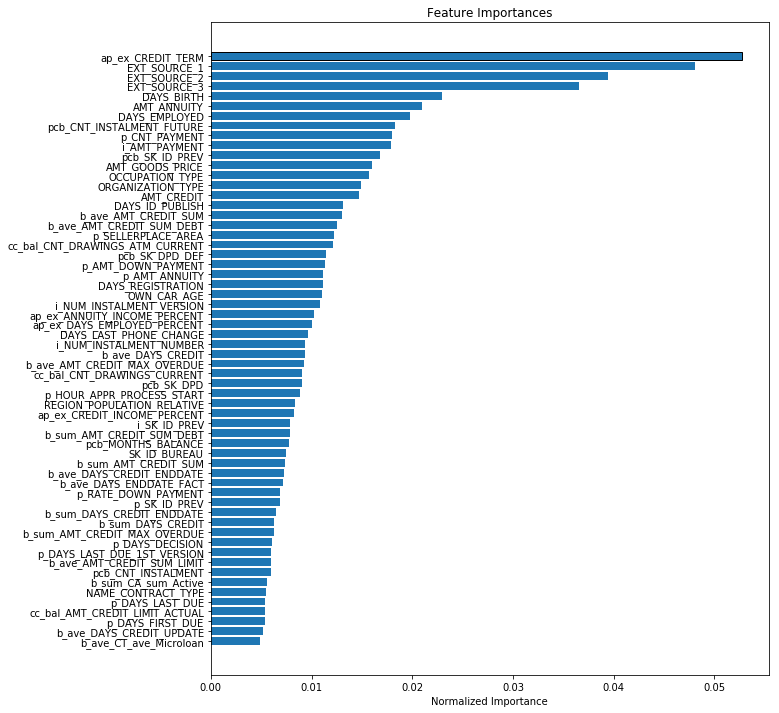

In [220]:
plt.figure(figsize = (12, 40))
fi_sorted = plot_feature_importances(fi_lgb)

In [221]:
submission_lgb.to_csv('../submission/baseline_lgb_0819_2213.csv', index = False)

In [210]:
df_app_all[df_app_all['TARGET'] == 0].head(20)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,pcb_NAME_CONTRACT_STATUS_Canceled,pcb_NAME_CONTRACT_STATUS_Completed,pcb_NAME_CONTRACT_STATUS_Demand,pcb_NAME_CONTRACT_STATUS_Returned to the store,pcb_NAME_CONTRACT_STATUS_Signed,DAYS_EMPLOYED_ANOM,ap_ex_CREDIT_INCOME_PERCENT,ap_ex_ANNUITY_INCOME_PERCENT,ap_ex_CREDIT_TERM,ap_ex_DAYS_EMPLOYED_PERCENT
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,False,4.790750,0.132217,0.027598,-0.070862
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,False,2.000000,0.100000,0.050000,-0.011814
3,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,0.0,1.0,0.0,False,2.316167,0.219900,0.094941,-0.159905
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,False,4.222222,0.179963,0.042623,-0.152418
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4.0,0.0,0.0,1.0,False,4.954500,0.277955,0.056101,-0.093737
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0.0,7.0,0.0,0.0,0.0,False,9.127053,0.241526,0.026463,-0.227174
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,False,4.250000,0.116875,0.027500,-0.023820
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,True,9.063200,0.300680,0.033176,NaN
9,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,0.0,0.0,0.0,False,3.000000,0.150000,0.050000,-0.139540
10,21177.0,652500.0,652500.0,112500.000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,False,5.800000,0.188240,0.032455,-0.066588


In [211]:
df_app_all[df_app_all['TARGET'] == 1].head(20)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,pcb_NAME_CONTRACT_STATUS_Canceled,pcb_NAME_CONTRACT_STATUS_Completed,pcb_NAME_CONTRACT_STATUS_Demand,pcb_NAME_CONTRACT_STATUS_Returned to the store,pcb_NAME_CONTRACT_STATUS_Signed,DAYS_EMPLOYED_ANOM,ap_ex_CREDIT_INCOME_PERCENT,ap_ex_ANNUITY_INCOME_PERCENT,ap_ex_CREDIT_TERM,ap_ex_DAYS_EMPLOYED_PERCENT
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,False,2.007889,0.121978,0.060749,-0.067329
26,27076.5,979992.0,702000.0,112500.0,0.0,0.0,0.0,2.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,False,8.711040,0.240680,0.027629,-0.140355
40,35028.0,1193580.0,855000.0,202500.0,0.0,0.0,2.0,0.0,0.0,4.0,...,0.0,2.0,0.0,0.0,0.0,False,5.894222,0.172978,0.029347,-0.072189
42,16258.5,288873.0,238500.0,135000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,4.0,0.0,0.0,0.0,False,2.139800,0.120433,0.056283,-0.268754
81,14593.5,252000.0,252000.0,81000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,True,3.111111,0.180167,0.057911,NaN
94,64107.0,953460.0,900000.0,315000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,False,3.026857,0.203514,0.067236,-0.197568
110,30802.5,723996.0,585000.0,157500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,False,4.596800,0.195571,0.042545,-0.025366
138,36747.0,675000.0,675000.0,292500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,False,2.307692,0.125631,0.054440,-0.012000
154,12667.5,245619.0,166500.0,157500.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,2.0,0.0,0.0,0.0,False,1.559486,0.080429,0.051574,-0.437678
163,21037.5,225000.0,225000.0,111915.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,False,2.010454,0.187977,0.093500,-0.018776
